In [1]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests
from io import StringIO
import scipy

In [2]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)


# Q1. 畫出 Diamond Shape

In [3]:
def pyramid(k):
    
    
    for L in range(k):
        print( (k-L)*" "+(2*L-1)*("*" ))
          
    for L in range(k+1):
        print( L*" "+(2*k-1-2*L)*("*" ))              

In [4]:
pyramid(10)

          
         *
        ***
       *****
      *******
     *********
    ***********
   *************
  ***************
 *****************
*******************
 *****************
  ***************
   *************
    ***********
     *********
      *******
       *****
        ***
         *
          


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [5]:
df1=pd.read_csv('symbols01.txt',sep=' ',header = None)
df2=pd.read_csv('symbols02.txt',header = None)

In [6]:
##01 資料長度 340
df1_list=df1[0].tolist()
len(df1_list)

340

In [7]:
#02 資料長度382
df2_list=df2[0].tolist()
len(df2_list)

382

In [8]:
#資料01 02 交集長度
df3_list=[]
for i in df1_list :
    if i in df2_list :
        df3_list.append(i)  
len(df3_list)

94

In [9]:
#資料01 02 聯集
df4_list=df1_list+df2_list
df4_list = list(set(df4_list))
len(df4_list)

628

In [10]:
#轉換成 symbols03.txt
with open ('symbols03.txt','w') as f:
    for i in df4_list:
        f.write(i.strip().upper()+'\n')

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [11]:
r=requests.get(" http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [12]:
r.encoding='big5'
r.text

'106年12月12日17:30:01公司基本資料,\r\n"公司代號","公司名稱","產業別","住址","營利事業統一編號","董事長","總經理","發言人","發言人職稱","代理發言人",總機電話","成立日期","上市日期","普通股每股面額","實收資本額","私募股數","特別股","編制財務報表類型","股票過戶機構","過戶電話","過戶地址","英文簡稱","英文通訊地址","傳真機號碼","電子郵件信箱","網址" \r\n"1101","台灣水泥股份有限公司","水泥工業","台北市中山北路2段113號","11913502","張安平","李鐘培","黃健強","資深副總經理","蔡立文","(02)2531-7099","19501229","19620209","新台幣                 10.0000元","42465090100","0","0","1","中國信託商業銀行代理部","66365566","台北市重慶南路一段83號5樓","TCC","No.113, Sec.2, Zhongshan N. Rd.,Taipei City 104,Taiwan (R.O.C.)","(02)2531-6529","finance@taiwancement.com","http://www.taiwancement.com",\r\n"1102","亞洲水泥股份有限公司","水泥工業","台北市大安區敦化南路2段207號30、31樓","03244509","徐旭東","李坤炎","周維崑","副總經理","吳玲綾","02-2733-8000","19570321","19620608","新台幣                 10.0000元","33614471980","0","0","1","亞東證券股份有限公司","02-2361-8608","台北市重慶南路一段86號3樓","ACC","30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUTH ROAD,SEC.2,TAIPEI,TAIWAN,R.O.C","02-2378-5191","service@acc.com.tw","www.acc.com.tw",\r\n"1103","嘉新水泥股份有限公司","水泥

In [13]:
df5=r.text.split('\r\n')

In [14]:
df5=StringIO(r.text)
pd.read_csv(df5,skiprows=1)


,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [16]:
df = data['GOOG']
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020084E140B8>], dtype=object)

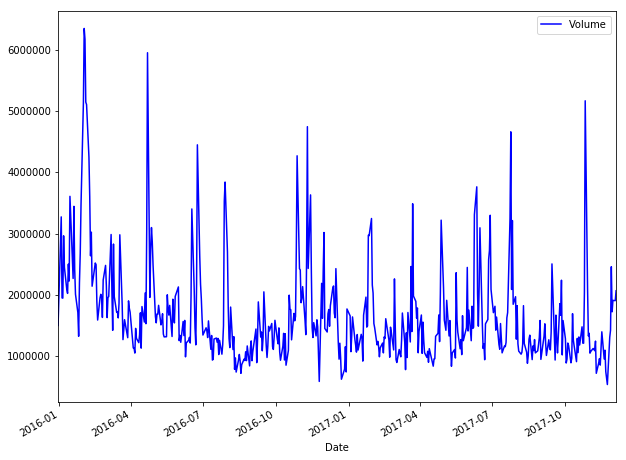

In [17]:
#df["Volume"].plot.bar()
df[["Volume"]].plot(subplots= True , figsize=(10,8) ,color="B")

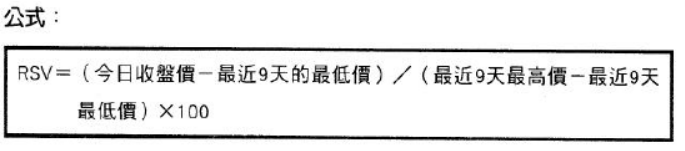

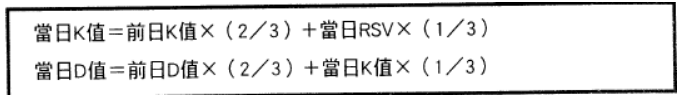

In [18]:
## KD線
##計算n日RSV
RSV_list=[]

i=0
while i<= (len(df.index)-9):
        
    rsv=100*(   df['Close'][i+9-1]-np.min(df['Low'][i:i+9])  )/(np.max(df['High'][i:i+9]-np.min(df['Low'][i:i+9])))
    RSV_list.append(rsv)
    i+=1
RSV_list

[2.7507583402262288,
 40.731296064370348,
 13.627519613723578,
 26.565254054853739,
 38.611290406390367,
 54.2127974016907,
 84.564097125600853,
 62.475578228880352,
 64.703937769660968,
 47.376795558410691,
 95.482408801245654,
 97.156031550545507,
 93.073301735609334,
 73.586116168017639,
 34.101386489607528,
 14.264765241886215,
 3.1170104848095543,
 15.519274872311508,
 11.868139228802189,
 16.607521093151639,
 15.811046032908495,
 15.251184021398544,
 25.071788853700802,
 70.910266784164335,
 69.567850081004238,
 76.790407575349377,
 84.753828257585837,
 60.808594445205209,
 69.169770969802258,
 78.37763575961597,
 74.395114187568637,
 52.036783256484007,
 100.0,
 97.067759178098243,
 80.673068320218803,
 76.772076144574555,
 36.664851180027718,
 24.898876868715433,
 57.414825452980153,
 79.284481843075994,
 99.759557225120759,
 90.011936409933952,
 85.705767824077583,
 97.352876496471922,
 90.836688320349296,
 90.524800112523764,
 98.002894110041453,
 89.793471496107784,
 73.2121

In [19]:
## K值
K_list=[50,50,50,50,50,50,50,50]
i=0
while i<= (len(df.index)-9):
    k=2/3*K_list[i+7]+1/3*RSV_list[i]
    K_list.append(k)
    i+=1
K_list

[50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 34.250252780075407,
 36.410600541507051,
 28.816240232245892,
 28.065911506448508,
 31.581037806429126,
 39.124957671516313,
 54.271337489544493,
 57.006084402656441,
 59.572035524991279,
 55.50695553613108,
 68.8321066245026,
 78.273414933183574,
 83.206710533992151,
 79.999845745333971,
 64.700359326758488,
 47.888494631801059,
 32.964666582803886,
 27.149536012639761,
 22.055737084693902,
 20.239665087513146,
 18.763458735978261,
 17.592700497785021,
 20.085729949756946,
 37.027242227892742,
 47.874111512263241,
 57.512876866625284,
 66.593193996945473,
 64.664994146365387,
 66.16658642084434,
 70.236936200434883,
 71.622995529479468,
 65.094258105147645,
 76.729505403431759,
 83.508923328320577,
 82.563638325619976,
 80.633117598604827,
 65.977028792412455,
 52.284311484513438,
 53.994482807335672,
 62.424482485915775,
 74.869507398984098,
 79.916983735967378,
 81.846578432004108,
 87.015344453493384,
 88.28912574244535,
 89.034350532471478,

In [20]:
## D值
D_list=[50,50,50,50,50,50,50,50]
i=0
while i <= (len(df.index)-9):
    d=2/3*D_list[i+7]+1/3*K_list[i+7+1]
    D_list.append(d)
    i+=1
D_list    

[50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 44.750084260025133,
 41.970256353852434,
 37.585584313316922,
 34.412360044360781,
 33.468585965050224,
 35.354043200538918,
 41.659807963540771,
 46.775233443245995,
 51.040834137161085,
 52.529541270151078,
 57.963729721601581,
 64.733624792128907,
 70.891320039416655,
 73.927495274722418,
 70.851783292067779,
 63.197353738645532,
 53.119791353364981,
 44.46303957312324,
 36.993938743646794,
 31.409180858268911,
 27.193940150838692,
 23.993526933154133,
 22.690927938688404,
 27.469699368423182,
 34.271170083036537,
 42.018405677566122,
 50.210001784025906,
 55.028332571472397,
 58.741083854596376,
 62.573034636542545,
 65.589688267521524,
 65.424544880063564,
 69.192865054519629,
 73.964884479119945,
 76.831135761286617,
 78.098463040392687,
 74.0579849577326,
 66.800093799992879,
 62.531556802440477,
 62.495865363598909,
 66.620412708727301,
 71.052603051140665,
 74.650594844761812,
 78.772178047672327,
 81.944493945929992,
 84.30777947477714

In [21]:
# 計算均線
df['20d'] = pd.Series.rolling(df['Close'], window=20).mean()
df['60d'] = pd.Series.rolling(df['Close'], window=60).mean()
df['K_index']=K_list
df['D_index']=D_list
df['J_index']=3*df['K_index']-2*df['D_index']
df['Talib_K_index']=talib.STOCH(df["High"].values,df['Low'].values,df['Close'].values )[0]
df['Talib_D_index']=talib.STOCH(df["High"].values,df['Low'].values,df['Close'].values )[1]
df['Talib_J_index']=3*df['Talib_K_index']-2*df['Talib_D_index']

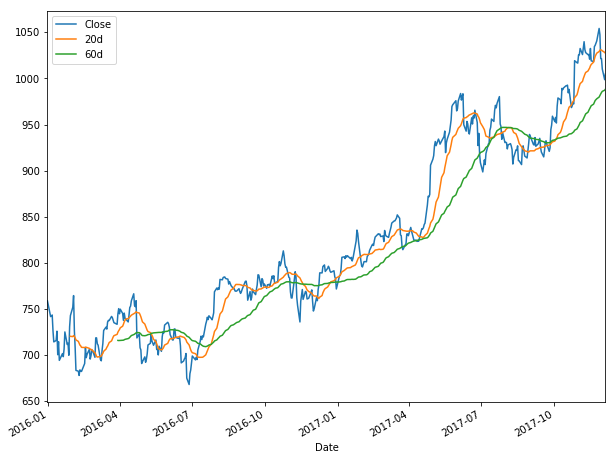

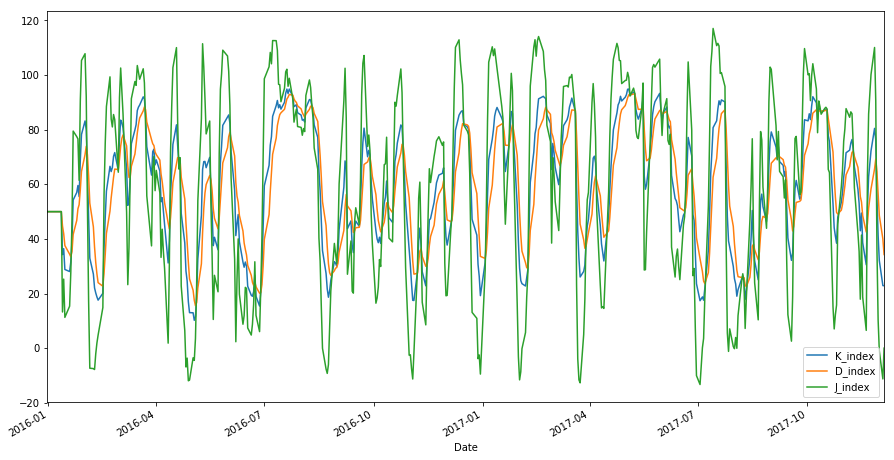

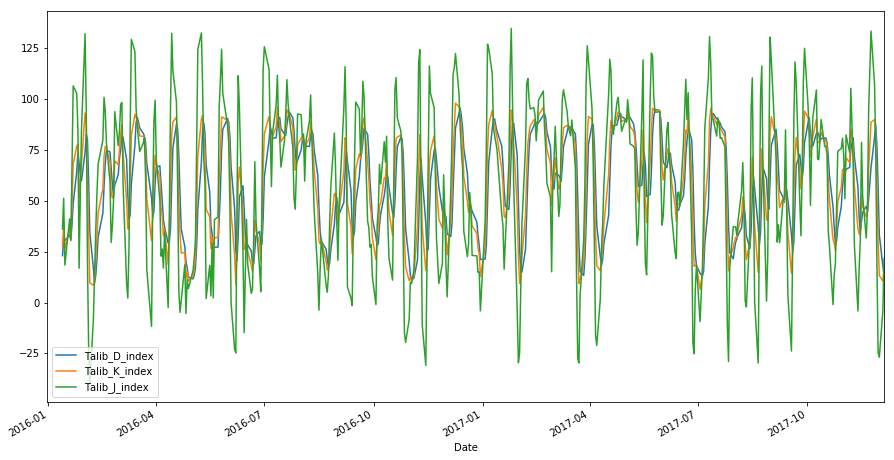

In [22]:
df[['Close', '20d', '60d']].plot(legend='best', figsize=(10,8))
df[['K_index','D_index','J_index']].plot(legend='best', figsize=(15,8))
df[['Talib_D_index','Talib_K_index','Talib_J_index']].plot(legend='best', figsize=(15,8))

# Q5. 策略回測

In [23]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [24]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [25]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [26]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [27]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [28]:
# 定義你的策略

def M064030027_strategy(df):

    df['Talib_K_index']=talib.STOCH(df["High"].values,df['Low'].values,df['Close'].values )[0]
    df['Talib_D_index']=talib.STOCH(df["High"].values,df['Low'].values,df['Close'].values )[1]
    df['Talib_J_index']=3*df['Talib_K_index']-2*df['Talib_D_index']
    has_position = False
    df['signals'] = 0
    for t in range(2,df['signals'].size):
        if df['Talib_K_index'][t] > df["Talib_D_index"][t] and df['Talib_J_index'][t]<10 :
            if not has_position:
                df.loc[df.index[t] ,"signals"]=1
                has_position =True
        elif df['Talib_K_index'][t] <df['Talib_D_index'][t] and df['Talib_J_index'][t]>90:
            if has_position:
                df.loc[df.index[t],'signals']= -1
                has_position = False
                
    # TODO
    # 填入你們的策略

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [29]:
def apply_strategy(strategy, df):
    return strategy(df)

In [30]:
# 計算各支股票的回測結果
results = []

strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy , M064030027_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

Symbol: CDZI 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: GOOG 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: TBNK 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: CSML 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: HBCP 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: PSC 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: NKSH 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: NEWT 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: AAPL 使用 M064030027_strategy 策略沒有出現買賣訊號。
Symbol: DFRG 使用 M064030027_strategy 策略沒有出現買賣訊號。


In [31]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [32]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,1.792711,-0.144224,78,1.346113,705,1,TICC,M064030027_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [33]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
55,10.351357,-0.000317,2,1.161420,705,1,CDXS,M064030027_strategy
68,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
16,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
69,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
62,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy


In [34]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
7,1.947893,-0.280787,115,3.181778,705,3,TWIN,M064030027_strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
73,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
74,1.433986,-0.222729,98,2.365434,705,2,BBGI,M064030027_strategy


In [35]:
results_df.sort_values('sharpe',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
55,10.351357,-0.000317,2,1.161420,705,1,CDXS,M064030027_strategy
16,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
19,7.010574,-0.034481,16,1.118930,705,1,TBNK,RSI_7030_strategy
72,6.525037,-0.049054,66,1.417397,705,2,BBGI,RSI_7030_strategy
68,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
